* Non-parametric supervised algorithm
* Used for classification & regression

<img src="http://scikit-learn.org/stable/_images/iris.svg">

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn import tree

In [3]:
iris = load_iris()

In [4]:
clf = tree.DecisionTreeClassifier()

In [5]:
clf = clf.fit(iris.data, iris.target)

In [6]:
#pip install graphviz
#http://www.webgraphviz.com/
import graphviz 

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None) 

In [8]:
graph = graphviz.Source(dot_data)

In [11]:
import sklearn.tree as sktree

In [12]:
sktree.export_graphviz( clf, out_file='tree.dot')

In [16]:
clf.predict(iris.data[:5])

array([0, 0, 0, 0, 0])

#### Decision Tree for Regression 

In [17]:
model = tree.DecisionTreeRegressor()

In [22]:
model.fit(iris.data[:,:3], iris.data[:,3])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
model.predict(iris.data[:10,:3])

array([ 0.25,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.4 ,  0.3 ,  0.2 ,  0.2 ,  0.1 ])

In [24]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

### Shortcomings of decision trees
* Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

* Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

* Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

* Use min_samples_split or min_samples_leaf to control the number of samples at a leaf node. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. The main difference between the two is that min_samples_leaf guarantees a minimum number of samples in a leaf, while min_samples_split can create arbitrary small leaves, though min_samples_split is more common in the literature.

* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

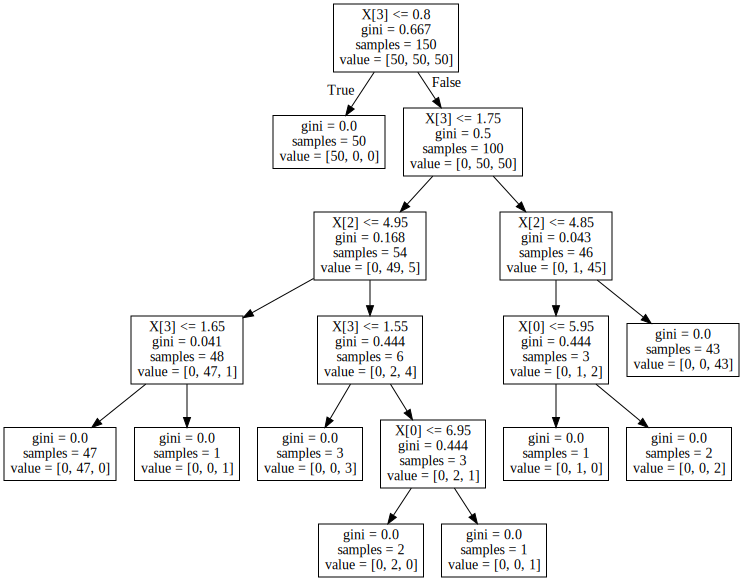

In [13]:
graph